In [5]:
#Loading essential libraries for data cleaning, exploratory analysis, and ML modeling.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Load Raw Data

In [16]:
#The objective of this project is identifying clients that will sign-up for a term account.
#Load raw data & view few rows in the dataset.
#Precision is the metric that will drive the model performance 

PBank = pd.read_csv('/content/sample_data/PortugueseBanking.csv')
PBank.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


# Cleaning The Data


> Obtain a better understanding of dataset.



In [7]:
#Checking data types
#Total of 45,211 records
PBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


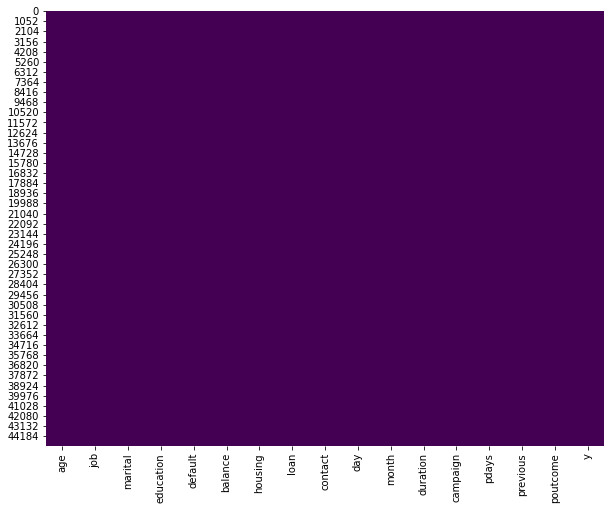

In [30]:
#This heatmap identifies null values in dataset.
#The result shows there are no null values
plt.figure(figsize = (10,8))
sns.heatmap(PBank.isnull(), cbar = False, cmap = 'viridis')

# Convert and transform data for easier analysis


> Create a unified dataset.



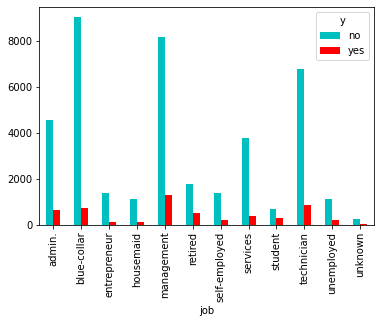

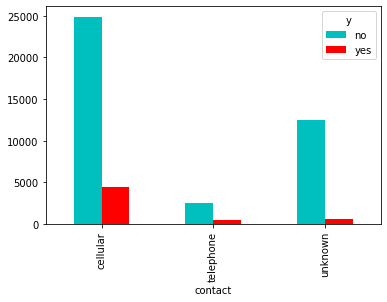

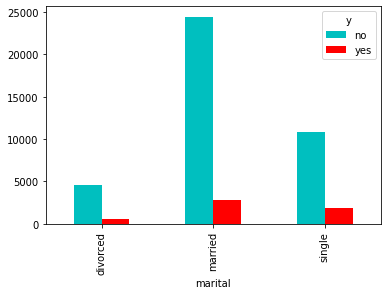

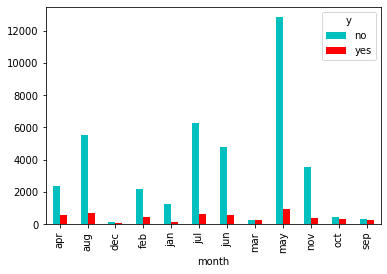

In [8]:
#Quick glance at potential predictive features
pd.crosstab(PBank['job'],PBank['y']).plot(kind = 'bar',color=['c', 'r'])
pd.crosstab(PBank['contact'],PBank['y']).plot(kind = 'bar',color=['c', 'r'])
pd.crosstab(PBank['marital'],PBank['y']).plot(kind = 'bar',color=['c', 'r'])
pd.crosstab(PBank['month'],PBank['y']).plot(kind = 'bar',color=['c', 'r'])

In [17]:
#Creating dummy variables for categorical data. 
PBank = pd.get_dummies(PBank, columns = ['marital', 'education', 'poutcome','job'])

#Check results
PBank.head(4)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,no,2143,yes,no,unknown,5,may,261,1,-1,0,no,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,44,no,29,yes,no,unknown,5,may,151,1,-1,0,no,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,33,no,2,yes,yes,unknown,5,may,76,1,-1,0,no,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,47,no,1506,yes,no,unknown,5,may,92,1,-1,0,no,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [18]:
#Convert columns with 'yes' or 'no' responses to corresponding numerical value.
Default = {'yes': 0, 'no': 1}
PBank['default'] = PBank['default'].map(Default)

House = {'yes': 0, 'no': 1}
PBank['housing'] = PBank['housing'].map(House)

Loan = {'yes': 0, 'no': 1}
PBank['loan'] = PBank['loan'].map(Loan)

Y = {'yes': 0, 'no': 1}
PBank['y'] = PBank['y'].map(Y)

#Check results
PBank.head(4)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2143,0,1,unknown,5,may,261,1,-1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,44,1,29,0,1,unknown,5,may,151,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,0,unknown,5,may,76,1,-1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,1506,0,1,unknown,5,may,92,1,-1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
#Change the unit of 'duration' from seconds to minutes
PBank['duration'] = PBank['duration'].apply(lambda n:n/60).round(2)

#Check results
PBank.head(3)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2143,0,1,unknown,5,may,4.35,1,-1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,44,1,29,0,1,unknown,5,may,2.52,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,0,unknown,5,may,1.27,1,-1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


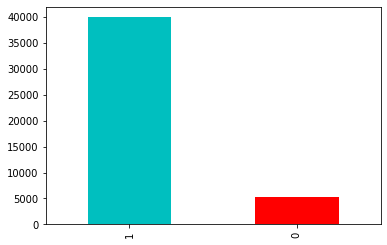

In [12]:
#Count of target values. 0 = yes 1 = no
PBank['y'].value_counts().plot(kind ='bar', color = ['c', 'r'])

# Exploratory Analysis


> Visualizing the distribution and relationship between key features.



In [20]:
#Remove clients with a negative account balance
Negative_Balance = (PBank['balance'] < 0)
PBank = PBank.drop(PBank[Negative_Balance].index, axis = 0, inplace = False)
PBank.head(2)

,age,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,2143,0,1,unknown,5,may,4.35,1,-1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,44,1,29,0,1,unknown,5,may,2.52,1,-1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


Text(0.5, 1.0, 'The Distribution of Balance')

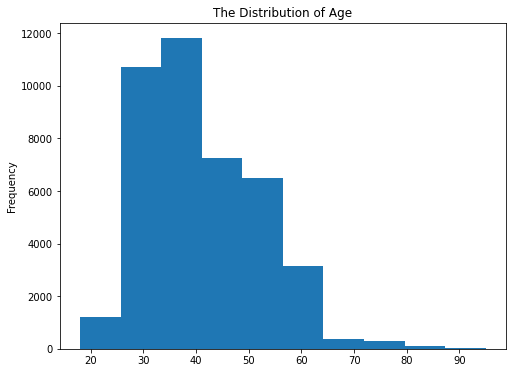

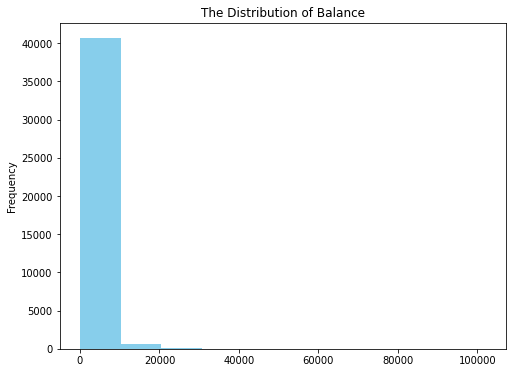

In [30]:
#Distribution of age and balance
plt.figure(figsize = (8,6))
PBank['age'].plot(kind = 'hist')
plt.title('The Distribution of Age')


#Distribution of age and balance
plt.figure(figsize = (8,6))
PBank['balance'].plot(kind = 'hist', color = 'skyblue')
plt.title('The Distribution of Balance')

# Logistical Regression Approach

> Train Logistical Regression model and analyze feature importance through coefficients.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

#Update Features
X = PBank.drop(['y', 'contact', 'month', 'default', 'balance', 'loan', 
                'job_student','job_unknown','day', 'pdays','age','housing', 'previous'], axis = 1)
y = PBank['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .2, random_state = 42)


#Class imbalance with Y target column 
from imblearn.over_sampling import SMOTE

OS = SMOTE(random_state = 42)

X_train_smote, y_train_smote = OS.fit_sample(X_train, y_train)

print("length of oversampled data is ",len(X_train_smote))
print("Number of no subscription in oversampled data",sum(y_train_smote == 0))
print("Number of subscription",sum(y_train_smote == 1))


#Create a scaler
#Logistical Regression has regularization
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train_smote)

#Only transform on test data
X_test_scaled = std_scale.transform(X_test)


#Create, fit, and predict on model
PBank_model = LogisticRegression(solver = 'lbfgs', max_iter = 2000)
Pbank_fit = PBank_model.fit(X_train_scaled, y_train_smote)


#Prediction with X_test
y_predict = (PBank_model.predict_proba(X_test_scaled)[:, 0] < 0.1)
           

#Score
PBank_model.score(X_train_scaled, y_train_smote)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


length of oversampled data is  15958
Number of no subscription in oversampled data 7979
Number of subscription 7979


0.9343902744704851

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, roc_curve, auc

#Precision is the metric that will drive the model performance 
#The accuracy, precision, recall and f1 scores
print('Accuracy :', accuracy_score(y_test, y_predict))
print('\n')
print(classification_report(y_test, y_predict))

Accuracy : 0.7518593270480246


              precision    recall  f1-score   support

           0       0.29      0.81      0.43      4226
           1       0.97      0.74      0.84     31943

    accuracy                           0.75     36169
   macro avg       0.63      0.77      0.64     36169
weighted avg       0.89      0.75      0.79     36169



In [ ]:
#Look at the coefficient and intercept of the model:
a = (list(zip(PBank_model.coef_[0], X.columns)))

coef = pd.DataFrame(a, columns = ['coef', 'features'])
coef

,coef,features
0,-1.557721,duration
1,0.470998,campaign
2,1.503254,marital_divorced
3,2.881780,marital_married
4,2.362888,marital_single
5,1.586953,education_primary
6,2.567572,education_secondary
7,2.118902,education_tertiary
8,0.911075,education_unknown
9,1.539098,poutcome_failure


In [ ]:
#Export to incorporate in Tableau dashboard
coef.to_excel("output.xlsx")  

Feature: duration, Score: -1.5577210704061746
Feature: campaign, Score: 0.47099784460355315
Feature: marital_divorced, Score: 1.5032542002647946
Feature: marital_married, Score: 2.881779707562425
Feature: marital_single, Score: 2.362888178541283
Feature: education_primary, Score: 1.5869530088760875
Feature: education_secondary, Score: 2.5675717611539133
Feature: education_tertiary, Score: 2.1189015479310163
Feature: education_unknown, Score: 0.9110751548247408
Feature: poutcome_failure, Score: 1.5390979939062732
Feature: poutcome_other, Score: 0.9050147253250114
Feature: poutcome_success, Score: 0.7430475640109592
Feature: poutcome_unknown, Score: 3.078593134515621
Feature: job_admin., Score: 0.7582627936032528
Feature: job_blue-collar, Score: 1.1002103336738003
Feature: job_entrepreneur, Score: 0.45391791390234293
Feature: job_housemaid, Score: 0.38087385768496607
Feature: job_management, Score: 0.9400079051386063
Feature: job_retired, Score: 0.41382138433975696
Feature: job_self-empl

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 <a list of 23 Text major ticklabel objects>)

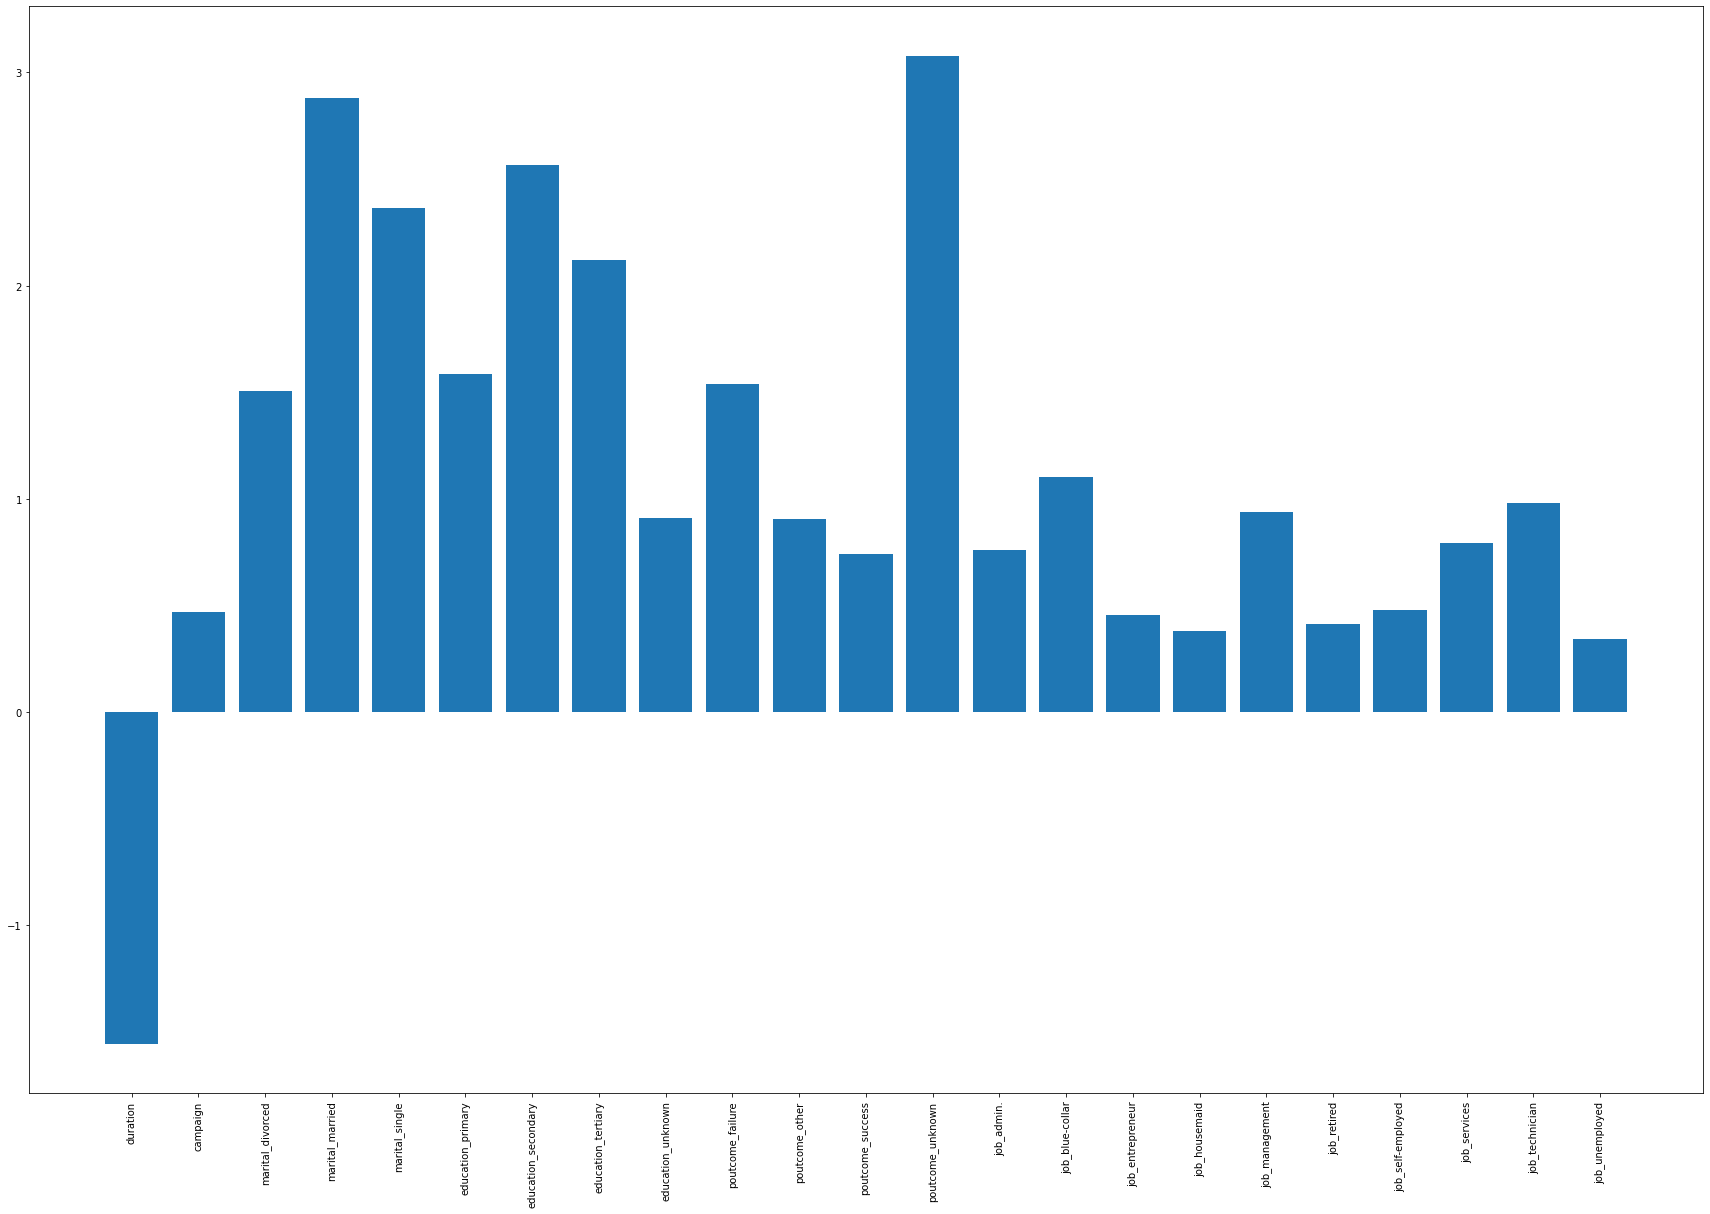

In [ ]:
#Variable for coefficients
importance = PBank_model.coef_[0]

#Summarize feature importance
for i,v in zip(coef['features'],importance):
	print(f'Feature: {i}, Score: {v}')

#Plot feature importance
plt.figure(figsize=(30,20))
plt.bar(coef['features'], importance)
plt.xticks(rotation=90)

[[ 3402   824]
 [ 8151 23792]]


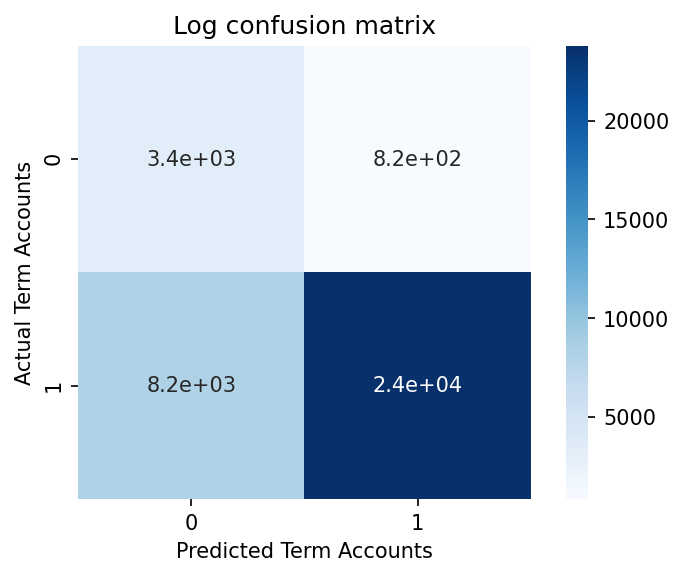

In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_predict))

#Print confusion matrix for Log
log_confusion = confusion_matrix(y_test, y_predict)
plt.figure(dpi=150)
sns.heatmap(log_confusion, cmap=plt.cm.Blues, annot=True, square=True)

#Labels
plt.xlabel('Predicted Term Accounts')
plt.ylabel('Actual Term Accounts')
plt.title('Log confusion matrix');